In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s5e3/sample_submission.csv
/kaggle/input/playground-series-s5e3/train.csv
/kaggle/input/playground-series-s5e3/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("/kaggle/input/playground-series-s5e3/train.csv")
test=pd.read_csv("/kaggle/input/playground-series-s5e3/test.csv")
sample_submission=pd.read_csv("/kaggle/input/playground-series-s5e3/sample_submission.csv")

In [4]:
data.shape

(2190, 13)

In [5]:
df=data.copy()

In [6]:
column=df.columns[2:12]

In [7]:
df.dtypes

id                 int64
day                int64
pressure         float64
maxtemp          float64
temparature      float64
mintemp          float64
dewpoint         float64
humidity         float64
cloud            float64
sunshine         float64
winddirection    float64
windspeed        float64
rainfall           int64
dtype: object

In [8]:
test.dtypes

id                 int64
day                int64
pressure         float64
maxtemp          float64
temparature      float64
mintemp          float64
dewpoint         float64
humidity         float64
cloud            float64
sunshine         float64
winddirection    float64
windspeed        float64
dtype: object

In [9]:
df.head()

id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
0   0    1    1017.4     21.2         20.6     19.9      19.4      87.0   
1   1    2    1019.5     16.2         16.9     15.8      15.4      95.0   
2   2    3    1024.1     19.4         16.1     14.6       9.3      75.0   
3   3    4    1013.4     18.1         17.8     16.9      16.8      95.0   
4   4    5    1021.8     21.3         18.4     15.2       9.6      52.0   

   cloud  sunshine  winddirection  windspeed  rainfall  
0   88.0       1.1           60.0       17.2         1  
1   91.0       0.0           50.0       21.9         1  
2   47.0       8.3           70.0       18.1         1  
3   95.0       0.0           60.0       35.6         1  
4   45.0       3.6           40.0       24.8         0

In [10]:
test.head()

id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
0  2190    1    1019.5     17.5         15.8     12.7      14.9      96.0   
1  2191    2    1016.5     17.5         16.5     15.8      15.1      97.0   
2  2192    3    1023.9     11.2         10.4      9.4       8.9      86.0   
3  2193    4    1022.9     20.6         17.3     15.2       9.5      75.0   
4  2194    5    1022.2     16.1         13.8      6.4       4.3      68.0   

   cloud  sunshine  winddirection  windspeed  
0   99.0       0.0           50.0       24.3  
1   99.0       0.0           50.0       35.3  
2   96.0       0.0           40.0       16.9  
3   45.0       7.1           20.0       50.6  
4   49.0       9.2           20.0       19.4

In [11]:
df.describe().T

count         mean         std    min       25%      50%  \
id             2190.0  1094.500000  632.342866    0.0   547.250  1094.50   
day            2190.0   179.948402  105.203592    1.0    89.000   178.50   
pressure       2190.0  1013.602146    5.655366  999.0  1008.600  1013.00   
maxtemp        2190.0    26.365799    5.654330   10.4    21.300    27.80   
temparature    2190.0    23.953059    5.222410    7.4    19.300    25.50   
mintemp        2190.0    22.170091    5.059120    4.0    17.700    23.85   
dewpoint       2190.0    20.454566    5.288406   -0.3    16.800    22.15   
humidity       2190.0    82.036530    7.800654   39.0    77.000    82.00   
cloud          2190.0    75.721918   18.026498    2.0    69.000    83.00   
sunshine       2190.0     3.744429    3.626327    0.0     0.400     2.40   
winddirection  2190.0   104.863151   80.002416   10.0    40.000    70.00   
windspeed      2190.0    21.804703    9.898659    4.4    14.125    20.50   
rainfall       2190.0     0.753425    0.431116    0.0     1.000     1.00   

                    75%     max  
id             1641.750  2189.0  
day             270.000   365.0  
pressure       1017.775  1034.6  
maxtemp          31.200    36.0  
temparature      28.400    31.5  
mintemp          26.400    29.8  
dewpoint         25.000    26.7  
humidity         88.000    98.0  
cloud            88.000   100.0  
sunshine          6.800    12.1  
winddirection   200.000   300.0  
windspeed        27.900    59.5  
rainfall          1.000     1.0

In [12]:
test.describe().T

count         mean         std     min       25%      50%  \
id             730.0  2554.500000  210.877136  2190.0  2372.250  2554.50   
day            730.0   183.000000  105.438271     1.0    92.000   183.00   
pressure       730.0  1013.503014    5.505871  1000.0  1008.725  1012.70   
maxtemp        730.0    26.372466    5.672521     7.4    21.600    27.80   
temparature    730.0    23.963288    5.278098     5.9    19.825    25.65   
mintemp        730.0    22.110274    5.170744     4.2    17.825    23.90   
dewpoint       730.0    20.460137    5.391169    -0.0    16.800    22.30   
humidity       730.0    82.669863    7.818714    39.0    77.250    82.00   
cloud          730.0    76.360274   17.934121     0.0    69.000    83.00   
sunshine       730.0     3.664384    3.639272     0.0     0.325     2.20   
winddirection  729.0   103.923182   81.695458    10.0    40.000    70.00   
windspeed      730.0    22.484247    9.954779     4.5    14.500    21.30   

                    75%     max  
id             2736.750  2919.0  
day             274.000   365.0  
pressure       1017.600  1032.2  
maxtemp          31.000    35.8  
temparature      28.375    31.8  
mintemp          26.400    29.1  
dewpoint         25.000    26.7  
humidity         89.000    98.0  
cloud            88.000   100.0  
sunshine          6.675    11.8  
winddirection   200.000   300.0  
windspeed        28.400    59.5

In [13]:
df.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

In [14]:
test.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        0
dtype: int64

In [15]:
test["winddirection"].fillna(method="ffill", inplace=True)

In [16]:
test.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [17]:
def histplot(col):
    plt.figure(figsize=(10,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} Distribution")
    

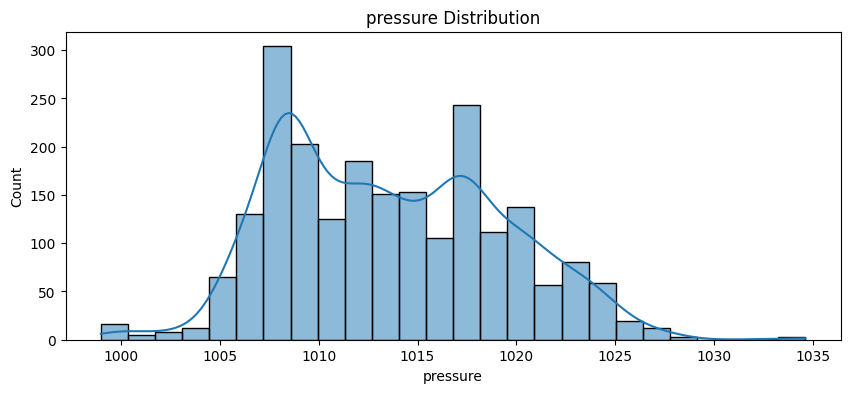

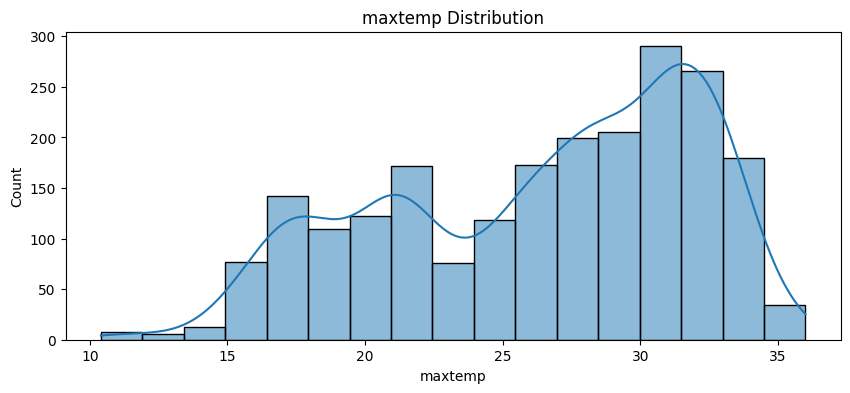

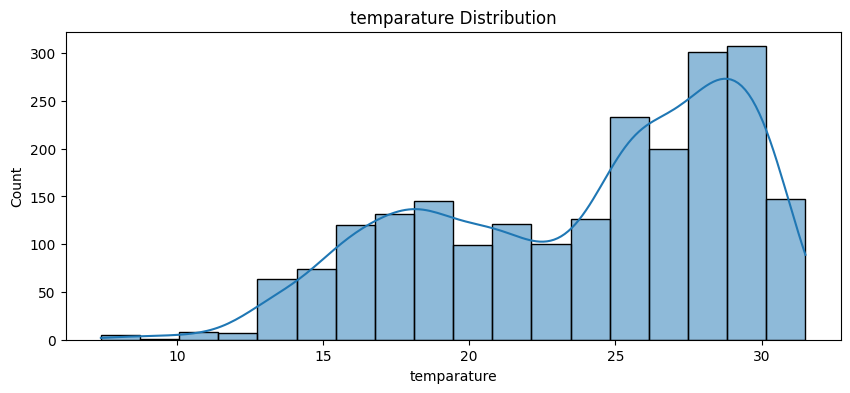

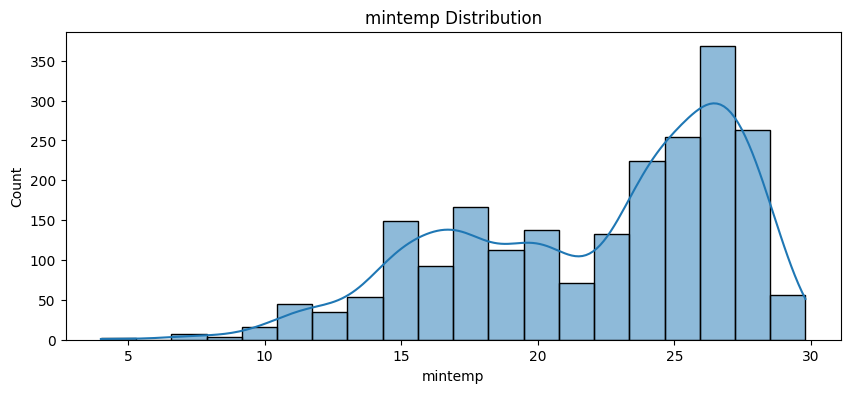

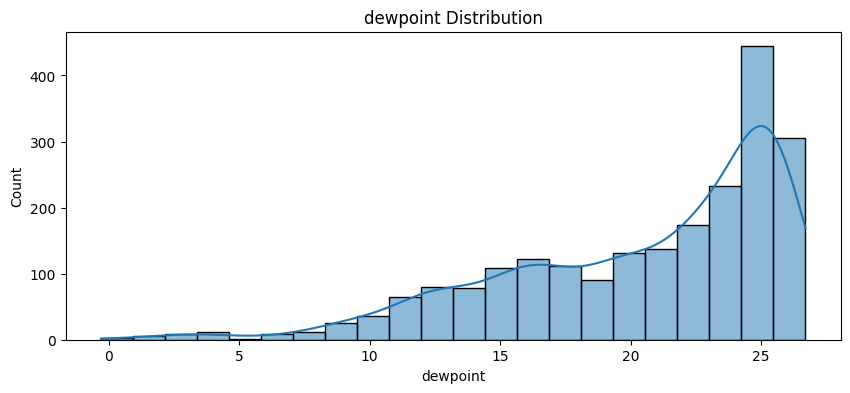

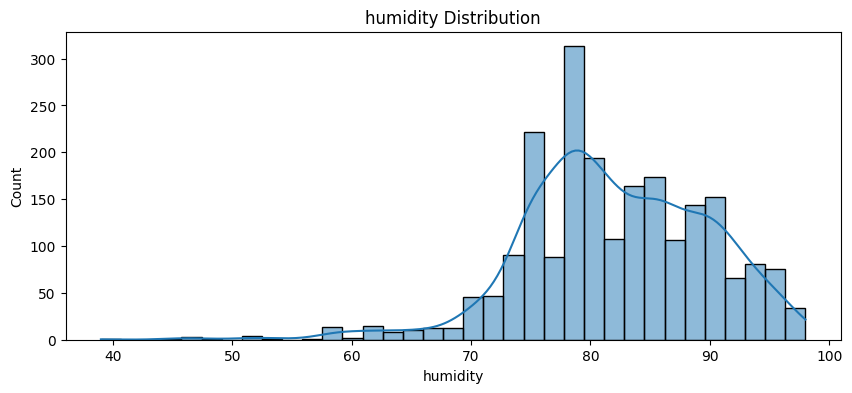

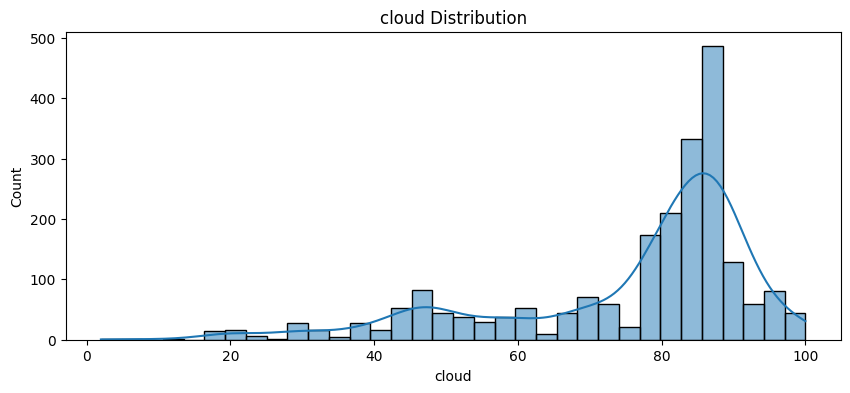

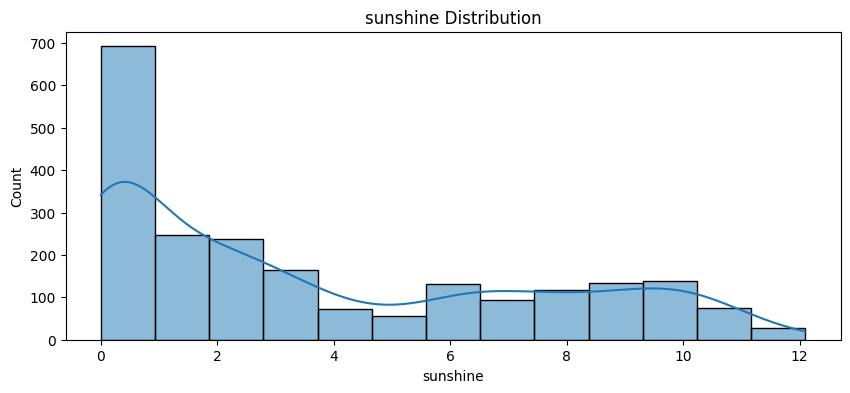

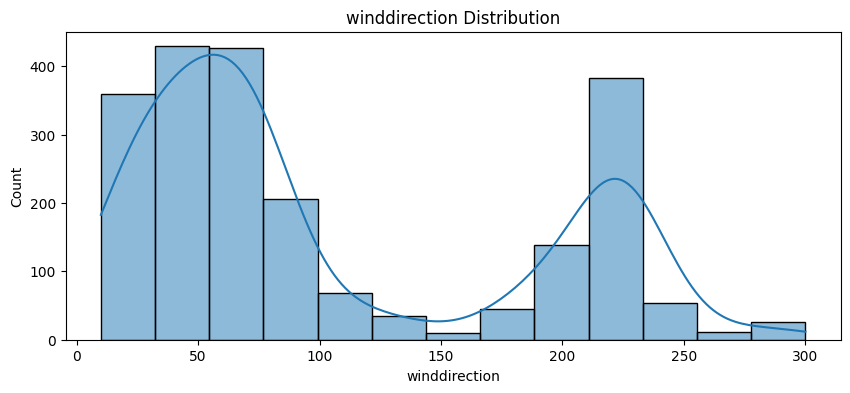

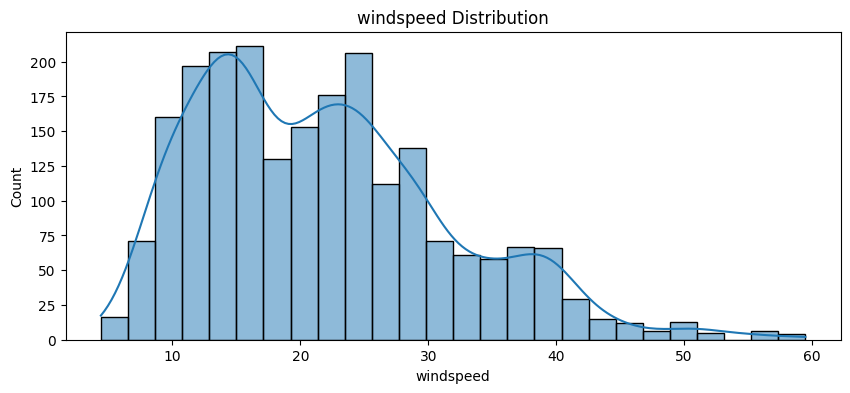

In [18]:
for col in column:
    histplot(col)
    

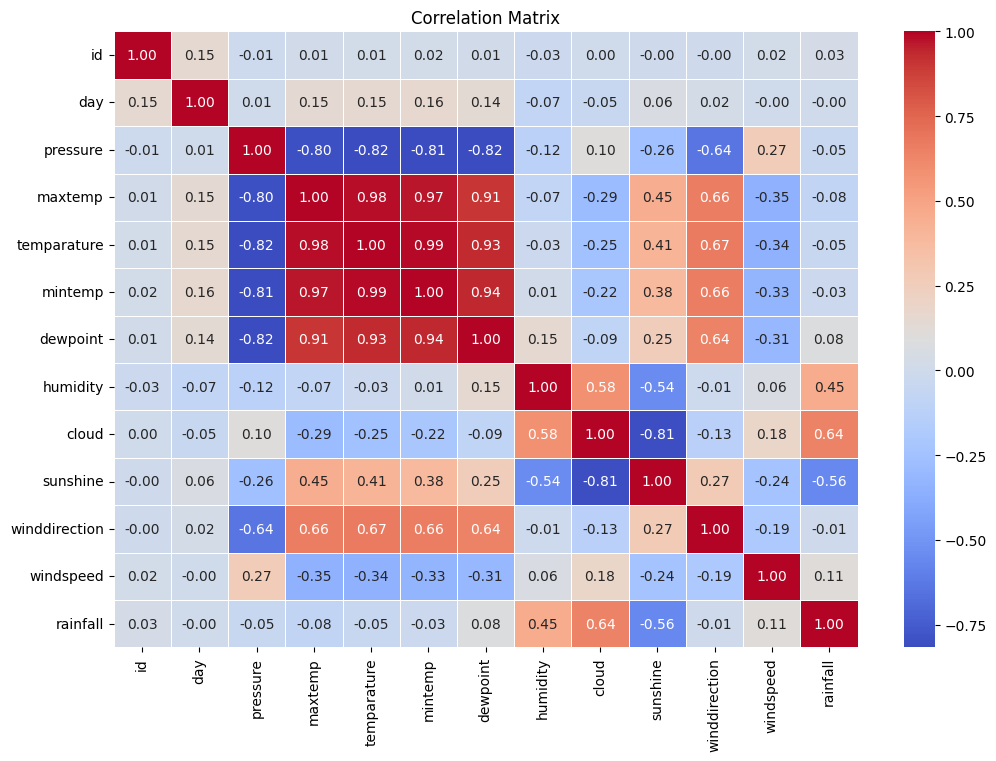

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [20]:
def box_plot(col):
    plt.figure(figsize=(10,4))
    sns.boxplot(df[col])
    plt.title(f"{col} Box Plot")

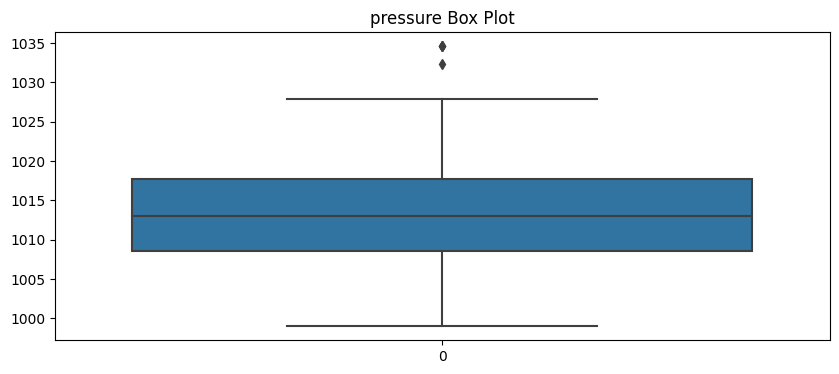

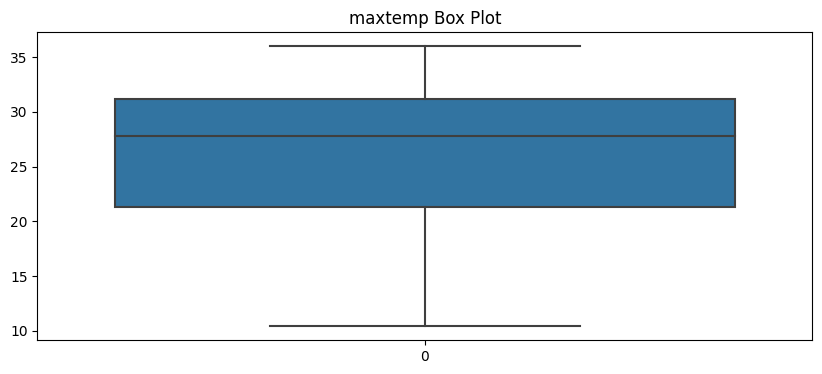

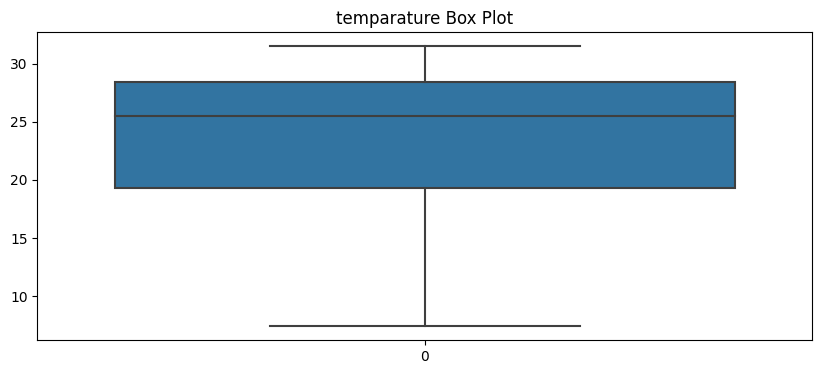

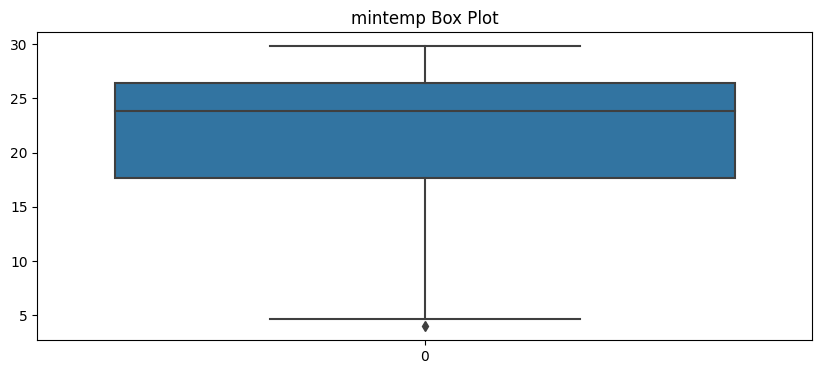

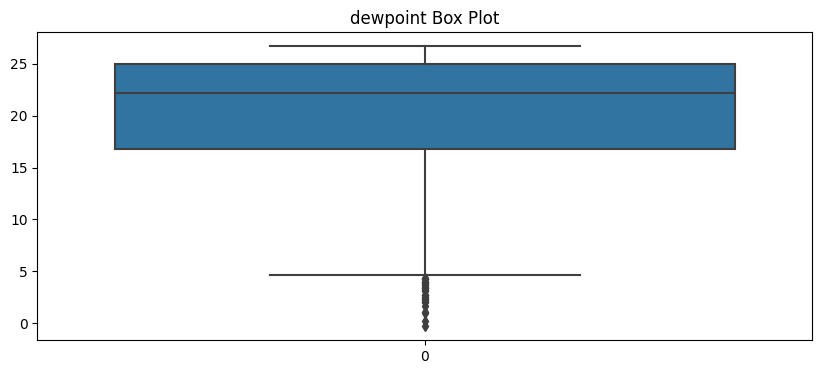

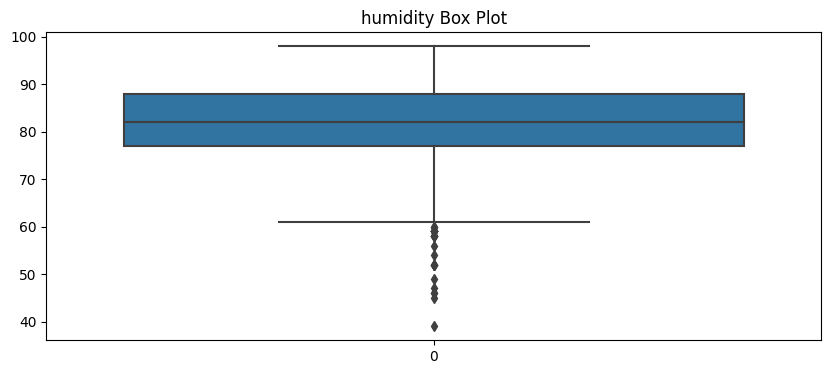

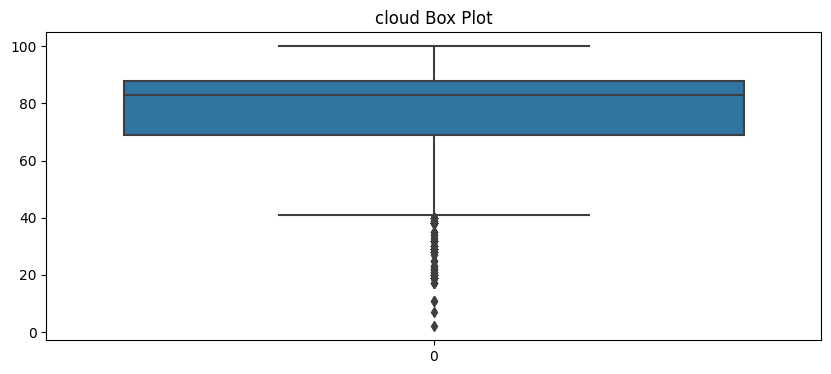

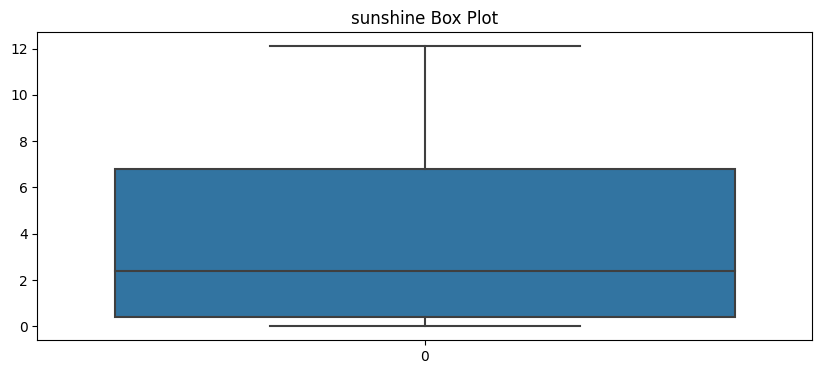

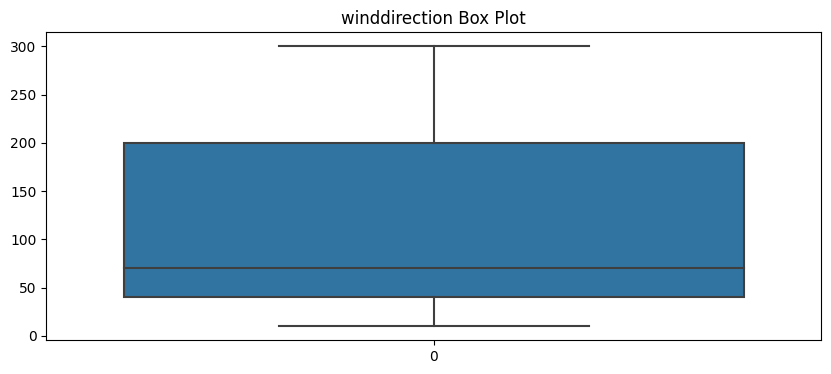

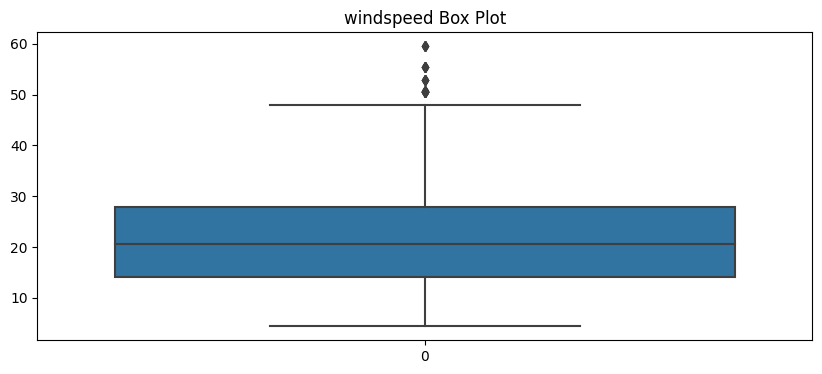

In [21]:
for col in column:
    box_plot(col)

In [22]:
from scipy import stats
# Shapiro-Wilk testi
for col in column:
    stat, p_value = stats.shapiro(df[col].dropna())
    print("Shapiro-Wilk Test p-value:", p_value)

Shapiro-Wilk Test p-value: 1.3541650895025296e-18
Shapiro-Wilk Test p-value: 2.2276579749730124e-29
Shapiro-Wilk Test p-value: 1.4851048714619923e-31
Shapiro-Wilk Test p-value: 3.728340679774066e-32
Shapiro-Wilk Test p-value: 1.2757738135106006e-36
Shapiro-Wilk Test p-value: 5.122586876400622e-21
Shapiro-Wilk Test p-value: 1.3265699492608219e-42
Shapiro-Wilk Test p-value: 1.4374321948273875e-39
Shapiro-Wilk Test p-value: 5.0919279065879915e-43
Shapiro-Wilk Test p-value: 3.5555787681875404e-26


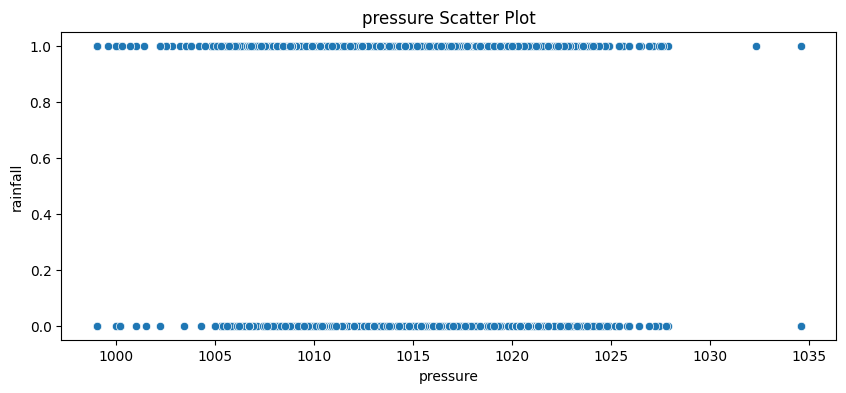

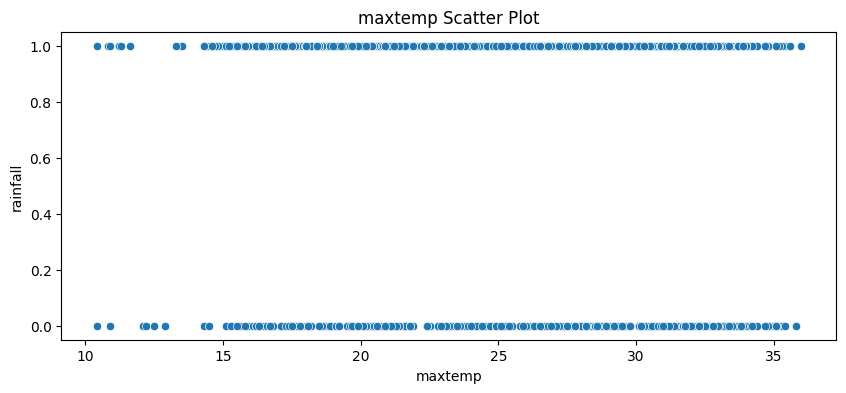

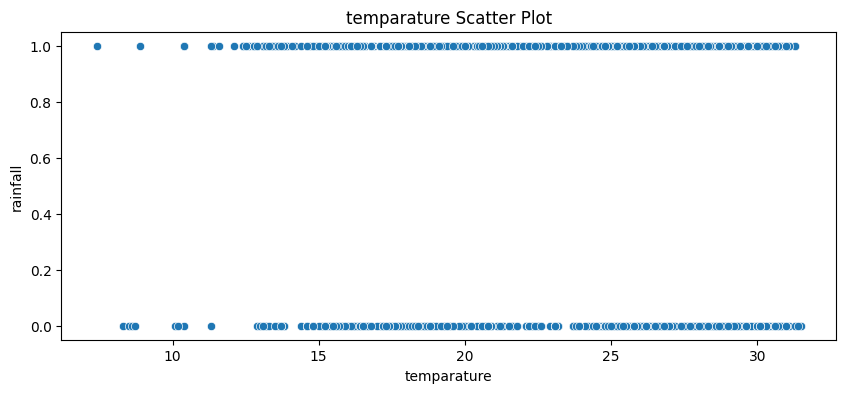

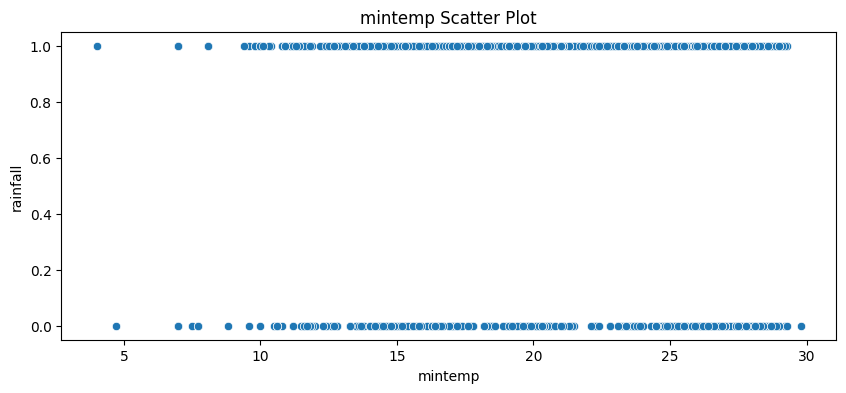

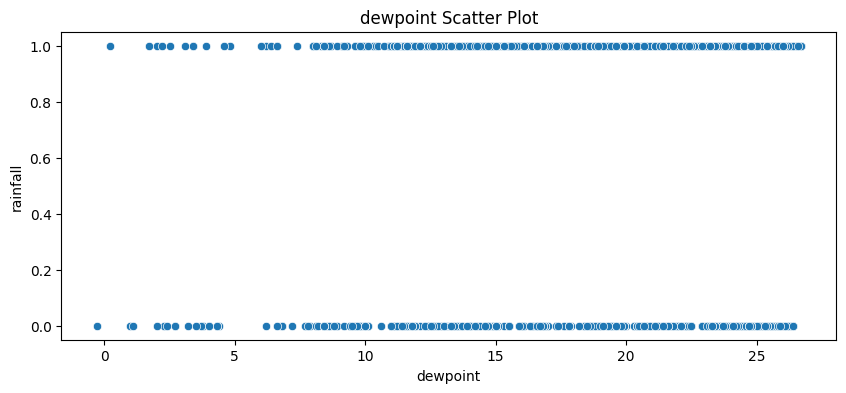

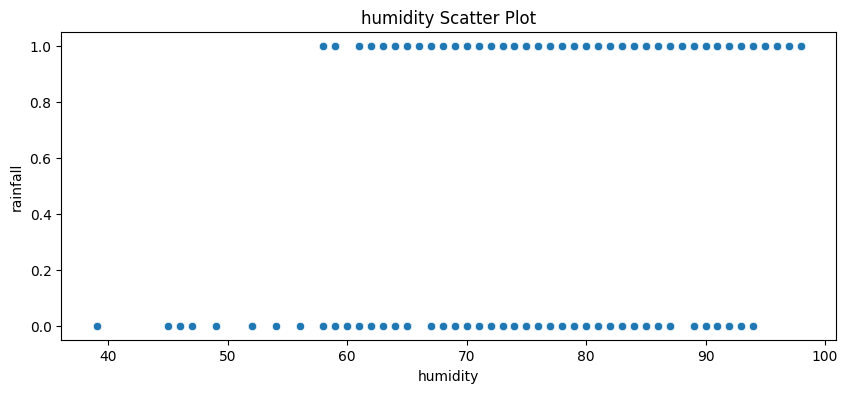

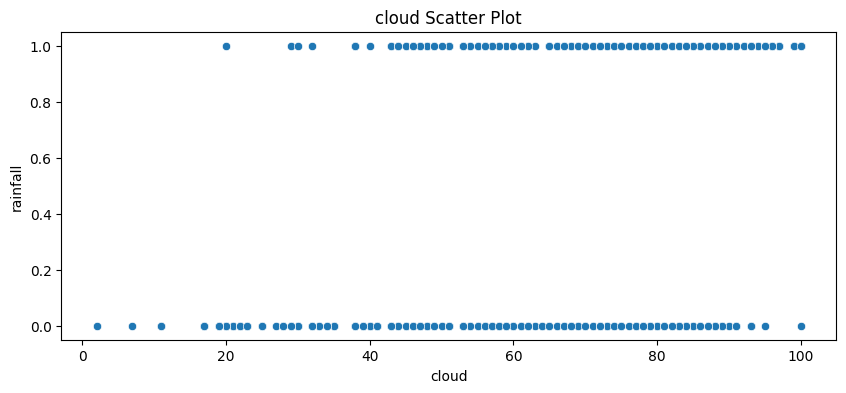

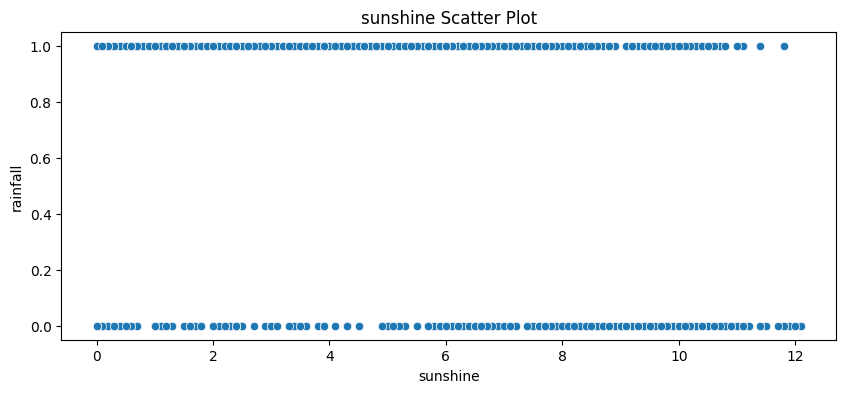

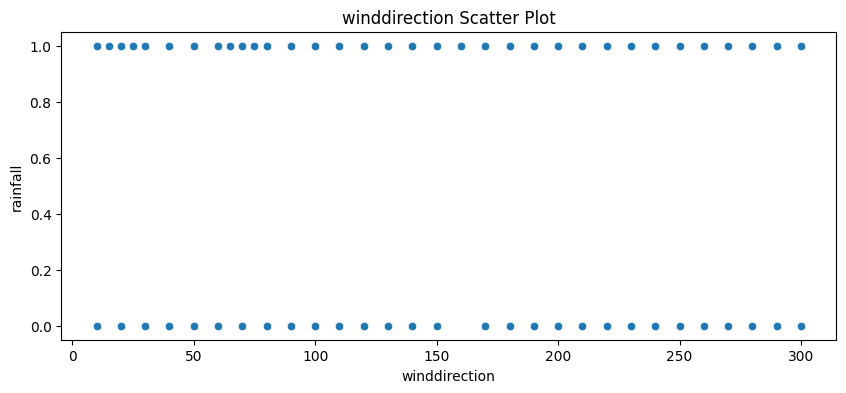

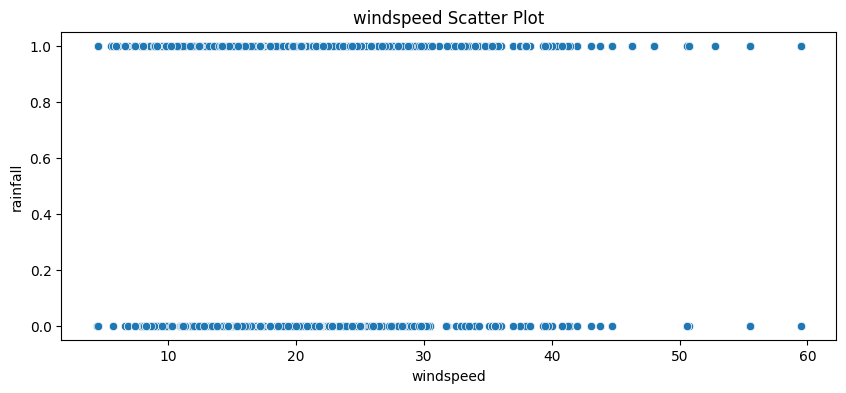

In [23]:
for col in column:
    plt.figure(figsize=(10,4))
    sns.scatterplot(x=df[col], y=df["rainfall"])
    plt.title(f"{col} Scatter Plot")

<Figure size 3000x2000 with 0 Axes>

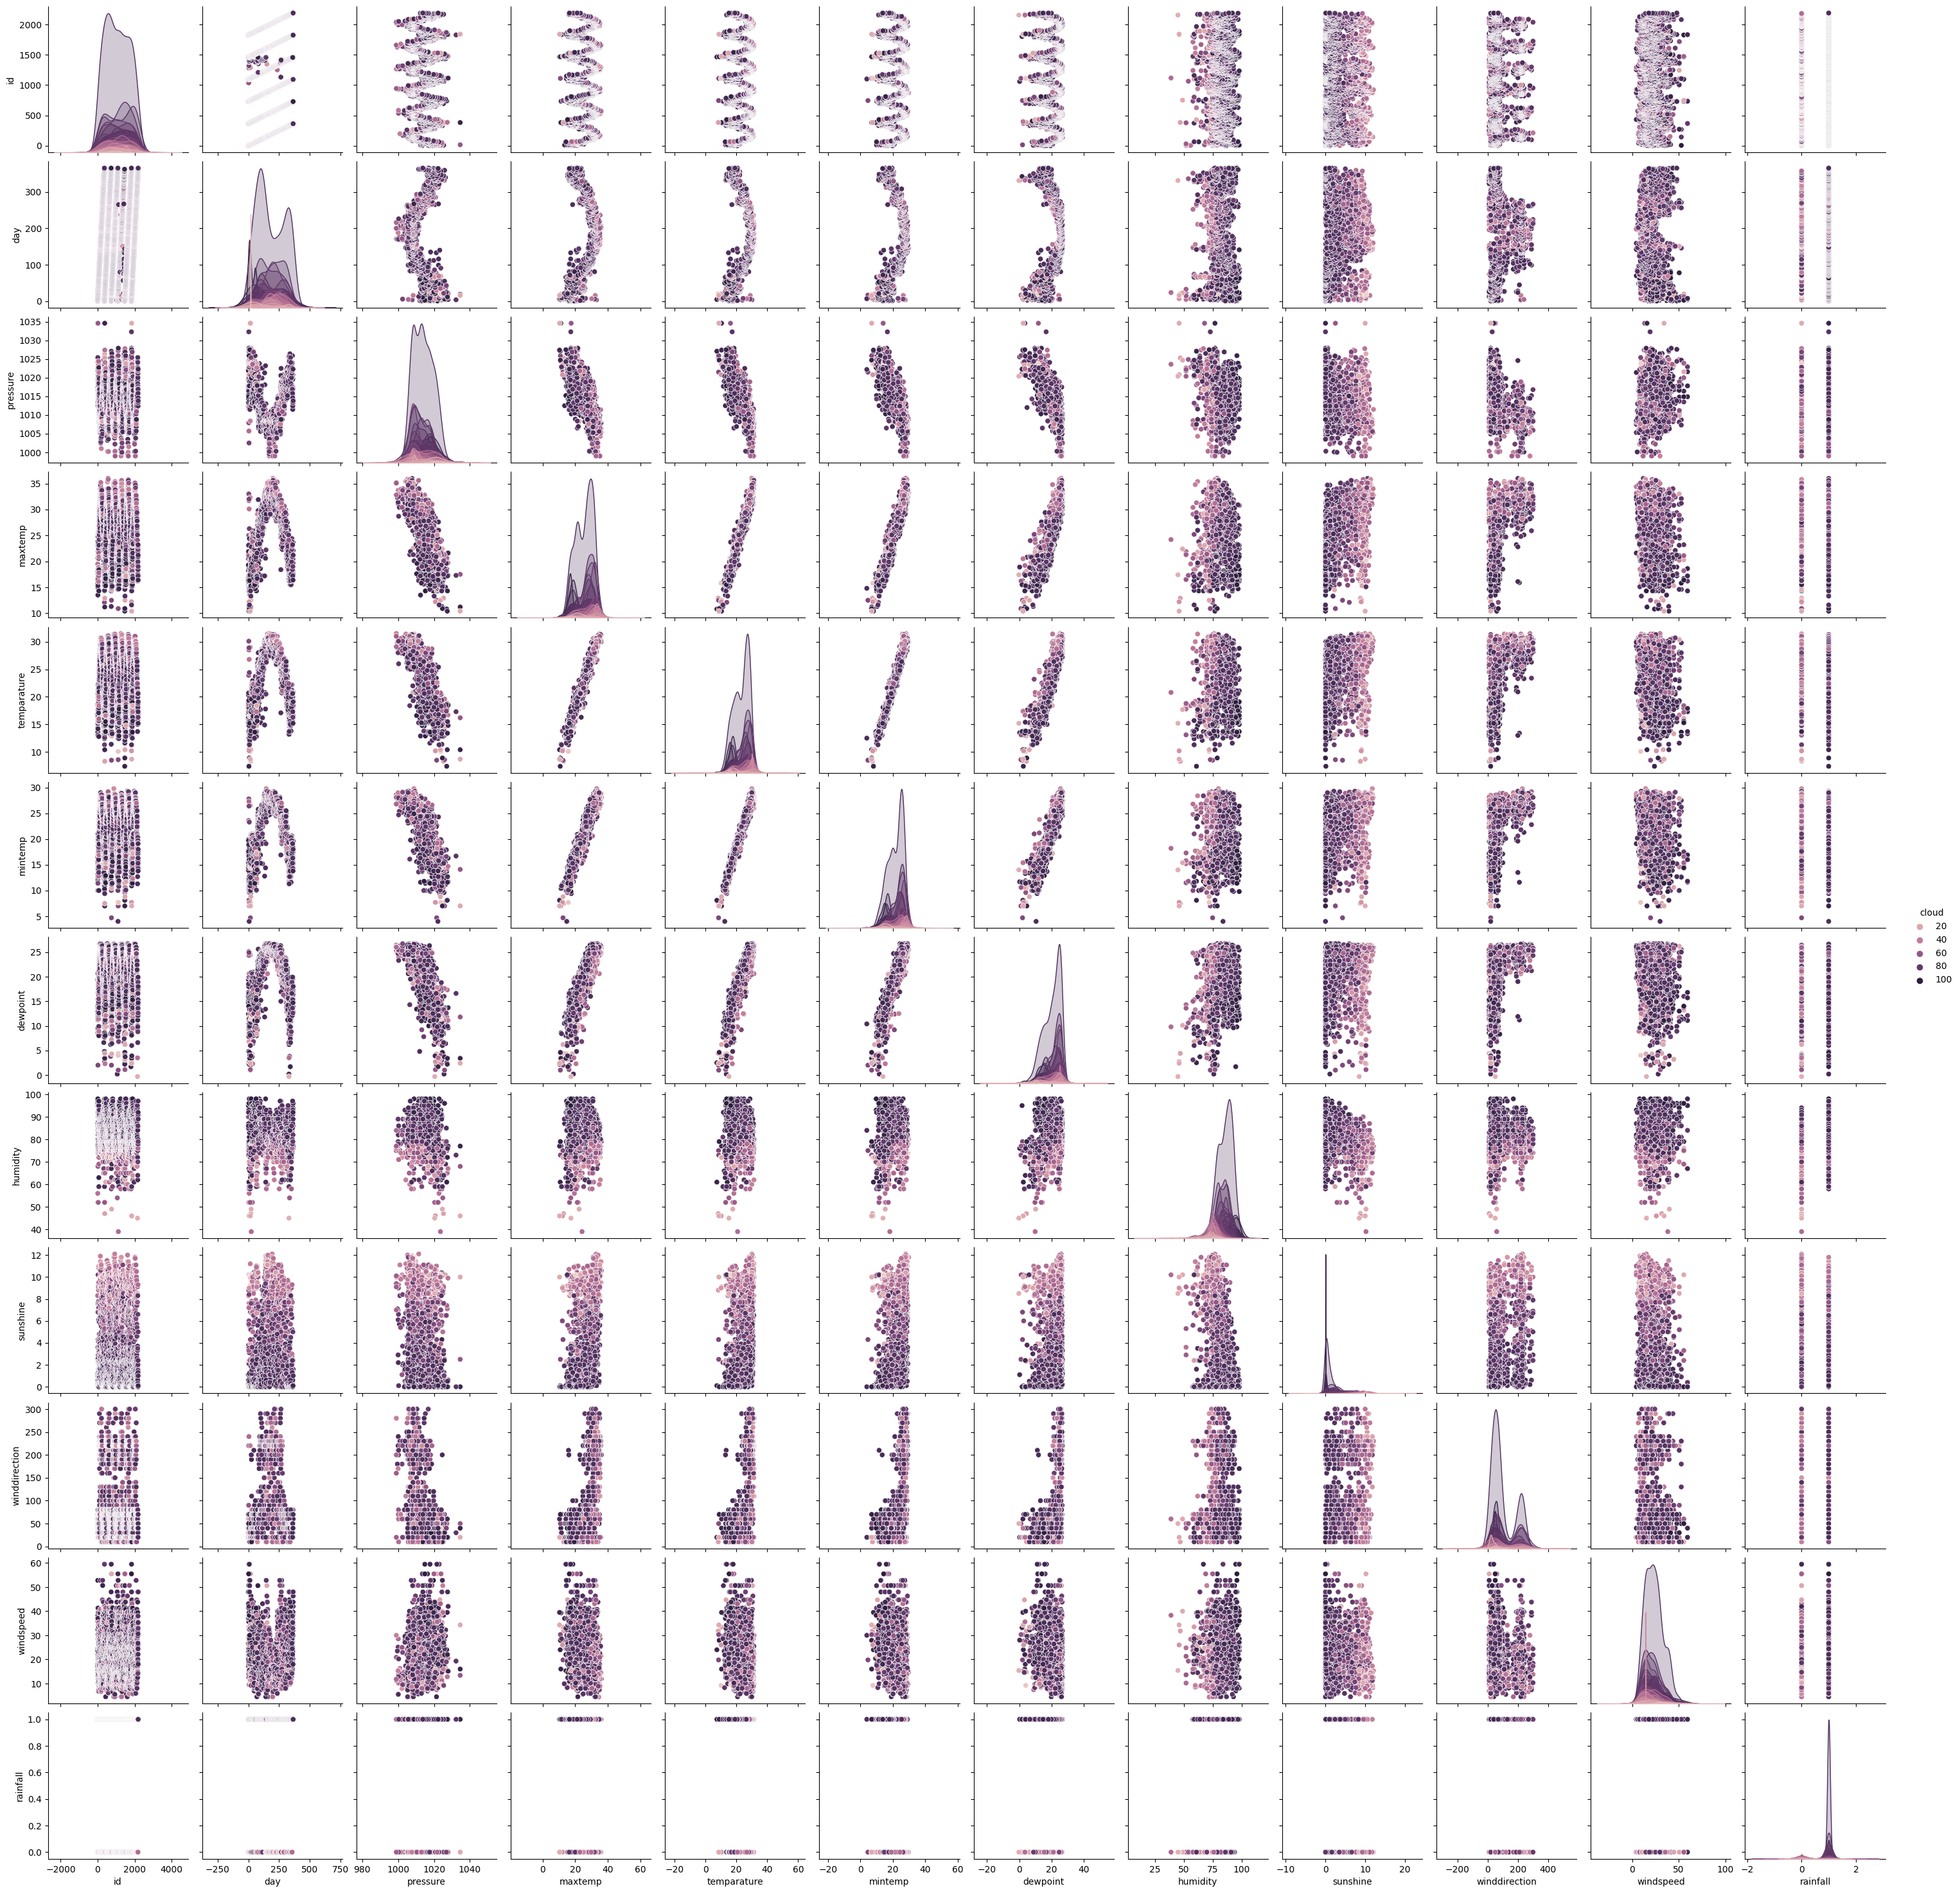

In [24]:
plt.figure(figsize=(30,20))
sns.pairplot(df, hue="cloud")
plt.show()

In [25]:
def outliers(df, col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQL=q3-q1
    down_limit=q1-1.5*IQL
    up_limit=q3+1.5*IQL
    #remove outlier observations from the data set
    df["outliers"]=(df[col]<down_limit)|(df[col]>up_limit)
    df.drop((df.loc[df["outliers"]==True]).index, inplace=True)
    print(f"{col} outliers count: {df['outliers'].value_counts()}")
   
    

In [26]:
for col in column:
    outliers(df, col)
df=df.drop(["outliers"], axis=1)

pressure outliers count: outliers
False    2186
Name: count, dtype: int64
maxtemp outliers count: outliers
False    2186
Name: count, dtype: int64
temparature outliers count: outliers
False    2186
Name: count, dtype: int64
mintemp outliers count: outliers
False    2184
Name: count, dtype: int64
dewpoint outliers count: outliers
False    2161
Name: count, dtype: int64
humidity outliers count: outliers
False    2138
Name: count, dtype: int64
cloud outliers count: outliers
False    2016
Name: count, dtype: int64
sunshine outliers count: outliers
False    2016
Name: count, dtype: int64
winddirection outliers count: outliers
False    2016
Name: count, dtype: int64
windspeed outliers count: outliers
False    1991
Name: count, dtype: int64


In [27]:
df.shape

(1991, 13)

In [28]:
X=df.iloc[:, 2:12]
y=df["rainfall"]

In [29]:
X

pressure  maxtemp  temparature  mintemp  dewpoint  humidity  cloud  \
0       1017.4     21.2         20.6     19.9      19.4      87.0   88.0   
1       1019.5     16.2         16.9     15.8      15.4      95.0   91.0   
2       1024.1     19.4         16.1     14.6       9.3      75.0   47.0   
3       1013.4     18.1         17.8     16.9      16.8      95.0   95.0   
5       1022.7     20.6         18.6     16.5      12.5      79.0   81.0   
...        ...      ...          ...      ...       ...       ...    ...   
2185    1014.6     23.2         20.6     19.1      19.9      97.0   88.0   
2186    1012.4     17.2         17.3     16.3      15.3      91.0   88.0   
2187    1013.3     19.0         16.3     14.3      12.6      79.0   79.0   
2188    1022.3     16.4         15.2     13.8      14.7      92.0   93.0   
2189    1013.8     21.2         19.1     18.0      18.0      89.0   88.0   

      sunshine  winddirection  windspeed  
0          1.1           60.0       17.2  
1          0.0           50.0       21.9  
2          8.3           70.0       18.1  
3          0.0           60.0       35.6  
5          0.0           20.0       15.7  
...        ...            ...        ...  
2185       0.1           40.0       22.1  
2186       0.0           50.0       35.3  
2187       5.0           40.0       32.9  
2188       0.1           40.0       18.0  
2189       1.0           70.0       48.0  

[1991 rows x 10 columns]

In [30]:
y.value_counts()

rainfall
1    1599
0     392
Name: count, dtype: int64

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)


In [32]:
test=test.drop(["id", "day"], axis=1)
test_scaled=scaler.fit_transform(test)

In [33]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [34]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((1592, 10), (1592,), (399, 10), (399,))

In [35]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [36]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [500, 700, 1000],
    'max_depth': [20, 22, 25],
    'min_samples_split': [10, 12, 20],
    'min_samples_leaf': [4, 6, 10],
    'max_features': ['sqrt', 'log2', None]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 22, 25],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [4, 6, 10],
                         'min_samples_split': [10, 12, 20],
                         'n_estimators': [500, 700, 1000]},
             scoring='accuracy', verbose=2)

In [38]:
print("En iyi parametreler:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


En iyi parametreler: {'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 20, 'n_estimators': 1000}


In [39]:
y_pred = model.predict(X_test)

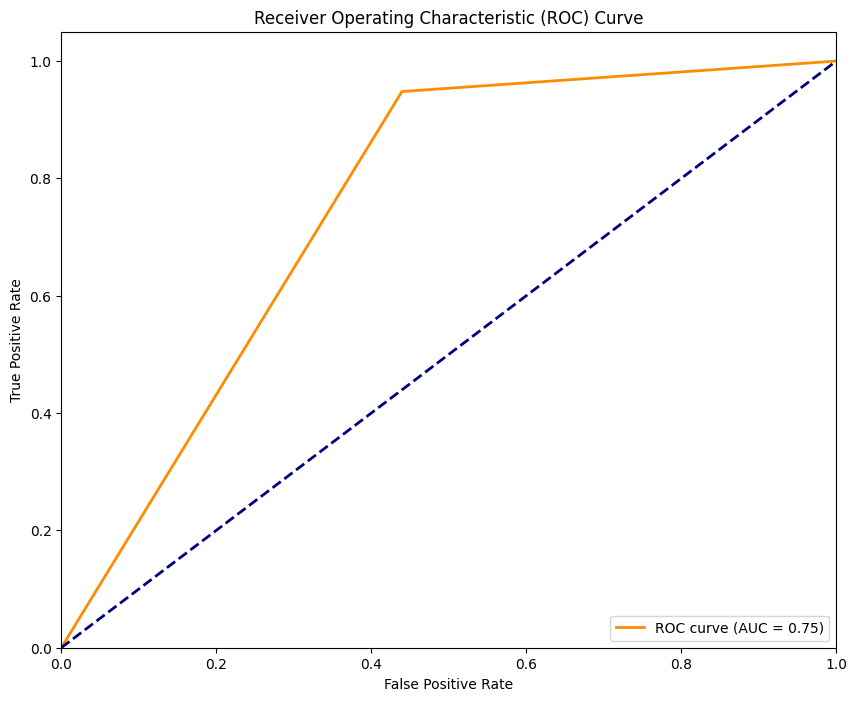

AUC: 0.7542457542457542


In [40]:
from sklearn.metrics import roc_curve, auc
# ROC eğrisini hesaplama
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# ROC eğrisini çizme
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Rastgele sınıflandırıcı çizgisi
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# AUC değerini yazdırma
print(f"AUC: {roc_auc}")


In [41]:
y_pred_real=model.predict(test_scaled)

In [42]:
y_pred_real

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [43]:
pd.DataFrame(y_pred_real).describe().T

count      mean       std  min  25%  50%  75%  max
0  730.0  0.931507  0.252763  0.0  1.0  1.0  1.0  1.0

In [44]:
sample_submission["rainfall"]=y_pred_real

In [45]:
sample_submission.index=sample_submission["id"]
sample_submission.drop(["id"], axis=1, inplace=True)

In [46]:
sample_submission.head(20)

rainfall
id            
2190         1
2191         1
2192         1
2193         0
2194         0
2195         1
2196         1
2197         1
2198         1
2199         1
2200         1
2201         0
2202         1
2203         1
2204         0
2205         0
2206         1
2207         1
2208         0
2209         0

In [47]:
sample_submission.to_csv("/kaggle/working/sample_submission.csv")